In [16]:
import csv
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [17]:
#highest score (for normalization of output result)
maxrisk = 3.873

#input data to train forecasting model
datadir = 'data/'
rawdata = pd.read_csv(datadir+'dataset for forecasting.csv')

# without population size and net migration
rawdata = rawdata[rawdata.columns.drop('popsize')]
rawdata = rawdata[rawdata.columns.drop('saldo')]

display(rawdata)

,avgemployers,avgsalary,shoparea,foodseats,retailturnover,livarea,sportsvenue,servicesnum,roadslen,livestock,harvest,agrprod,hospitals,beforeschool,factoriescap,risk
0,0.280113,0.333122,0.323305,0.603971,0.185225,0.336679,0.482769,0.349779,0.393286,0.163690,0.281129,0.142228,0.212517,0.359262,0.034407,0.000000
1,0.252645,0.298733,0.355888,0.645144,0.154703,0.343153,0.471835,0.384819,0.389950,0.156223,0.273982,0.142181,0.210714,0.361295,0.031478,0.042169
2,0.250860,0.297685,0.358085,0.675097,0.175312,0.349628,0.380698,0.352655,0.391161,0.160420,0.325963,0.147028,0.201303,0.336637,0.032722,0.009466
3,0.245680,0.303507,0.373225,0.609175,0.198826,0.356102,0.381693,0.387022,0.290948,0.164033,0.286087,0.129667,0.191738,0.353746,0.031219,0.258176
4,0.223813,0.335329,0.330200,0.775329,0.182948,0.362577,0.390612,0.307402,0.307309,0.154866,0.272602,0.126990,0.192745,0.335362,0.037874,0.345095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,0.578236,0.903360,0.345993,0.294188,0.278059,0.389446,0.217136,0.291979,0.447223,0.057480,0.063077,0.050494,0.246669,0.523433,0.278744,0.188468
7008,0.462401,0.732277,0.239531,0.090127,0.159356,0.402881,0.342516,0.235026,0.529505,0.124589,0.030463,0.153671,0.310241,0.737331,0.065133,0.000000
7009,0.463537,0.747087,0.240497,0.091008,0.150779,0.414374,0.345866,0.231392,0.535808,0.110920,0.028769,0.150115,0.313275,0.781865,0.064503,0.000000
7010,0.457025,0.755017,0.249907,0.090818,0.154325,0.426352,0.285488,0.207224,0.534803,0.115022,0.022863,0.131663,0.212581,0.759743,0.055862,0.000000


In [18]:
#shuffle the data
rawdata = rawdata.sample(frac=1)

# spliting input and output data
datasetin = np.array(rawdata[rawdata.columns.drop('risk')])
datasetout = np.array(rawdata[['risk']])

# spliting data on training and testing sets
trainin, testin, trainout, testout = train_test_split(datasetin, datasetout, test_size=0.2, random_state=42)

In [19]:
# forecasting model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(trainin, trainout.ravel())

RandomForestRegressor(random_state=0)

In [20]:
# calculation of error on training and testing sets
predtrain = model.predict(trainin)
errortrain = r2_score(trainout * maxrisk, predtrain * maxrisk)

predtest = model.predict(testin)
errortest = r2_score(testout * maxrisk, predtest * maxrisk)

print('R2 on training set: ', errortrain)
print('R2 on testing set: ', errortest)

R2 on training set:  0.952118023706393
R2 on testing set:  0.6394268089617258


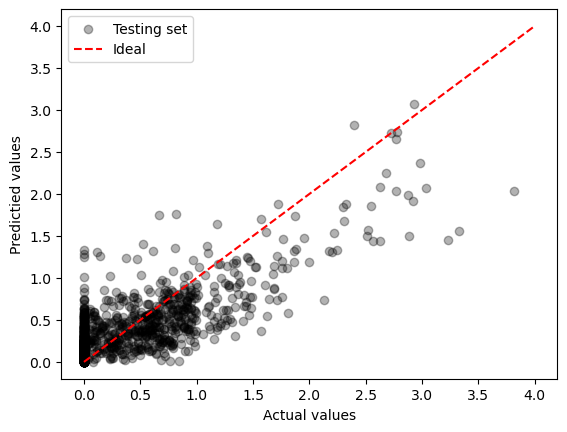

In [21]:
# vizualization of actual vs predicted
scale = np.linspace(trainout.min() * maxrisk, trainout.max() * maxrisk, 100)
plt.scatter(testout * maxrisk, predtest * maxrisk, c='black', alpha=.3, label='Testing set')
plt.plot([0, 4], [0, 4], ls='--', c='red', label='Ideal')
plt.xlabel('Actual values')
plt.ylabel('Predictied values')
plt.legend()
plt.show()

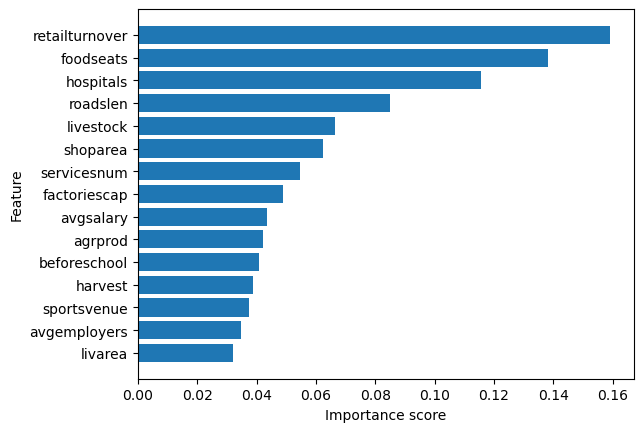

In [22]:
#feature importances based on Gini index
rawdata = rawdata[rawdata.columns.drop('risk')]
important = model.feature_importances_

forplot = pd.DataFrame(data=important, index=rawdata.columns)
forplot = forplot.sort_values(by=[0])
plt.barh(forplot.index, forplot[0])
plt.xlabel("Importance score")
plt.ylabel("Feature")
plt.show()